# Graph analysis
Graph analysis can be very effective in detecting and analyzing fraud, as it allows the visualization and exploration of complex relationships and patterns that may not be immediately apparent through traditional methods. Below is an example scenario of using graph analysis to detect fraudulent transactions:

## Scenario: 
Detecting Fraudulent Transactions in a Financial Network

## Data Setup
Imagine you have a dataset containing financial transactions. Each transaction has the following attributes:
* transaction_id: Unique identifier for the transaction.
* sender: The account sending money.
* receiver: The account receiving money.
* amount: The amount of money transferred.
* timestamp: The time the transaction occurred.

## Graph Construction
Construct a graph where each node represents an account, and each directed edge represents a transaction from the sender to the receiver.

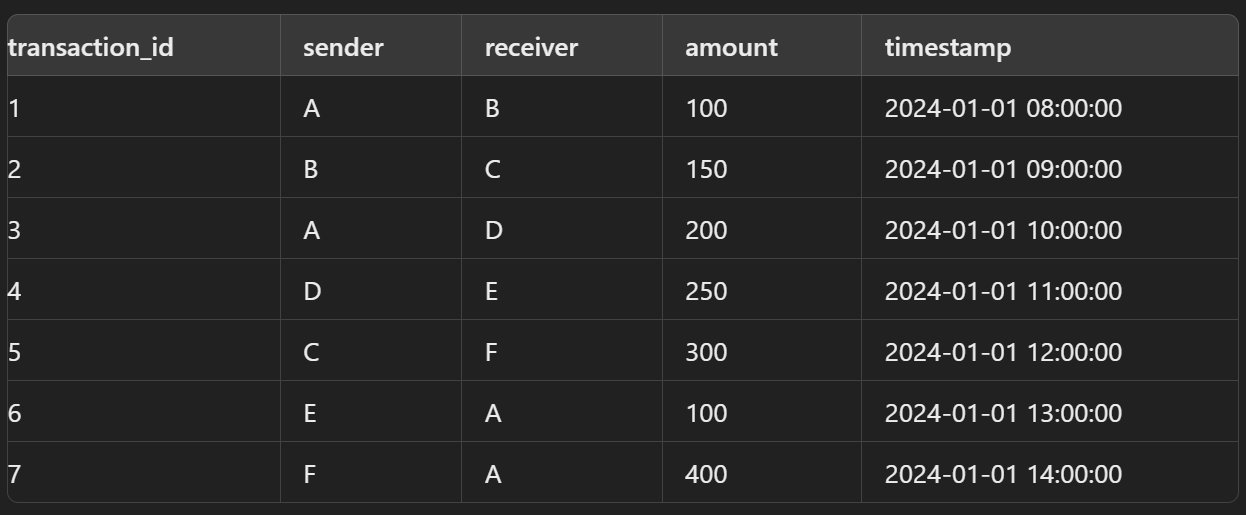

In [116]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [160]:
# Sample data
transactions = [
    ('A', 'B', 100),
    ('B', 'C', 150),
    ('A', 'D', 200),
    ('D', 'E', 250),
    ('C', 'F', 300),
    ('E', 'A', 100),
    ('F', 'A', 400),
]

transactions

[('A', 'B', 100),
 ('B', 'C', 150),
 ('A', 'D', 200),
 ('D', 'E', 250),
 ('C', 'F', 300),
 ('E', 'A', 100),
 ('F', 'A', 400)]

In [162]:
# Create a directed graph
G = nx.DiGraph()

G

In [164]:
# Add edges to the graph
for sender, receiver, amount in transactions:
    G.add_edge(sender, receiver, weight=amount)

G

In [166]:
# Draw the graph
pos = nx.spring_layout(G, seed = 5)
edge_labels = nx.get_edge_attributes(G, 'weight')

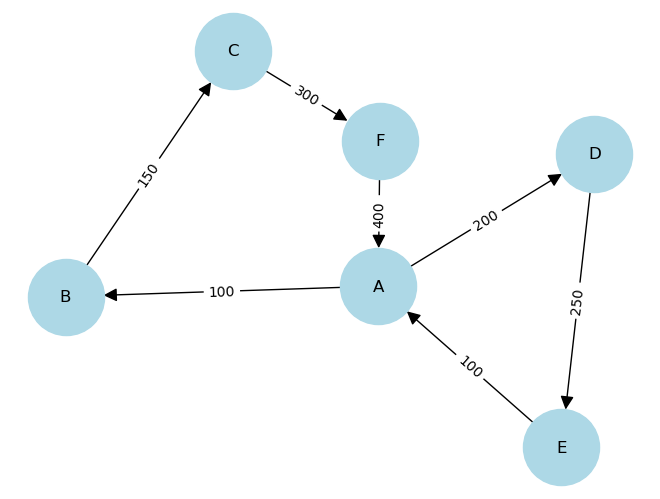

In [168]:
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Analyzing the Graph

## 1. Detecting Cycles
* A cycle means the funds have returned to the original account after passing through one or more intermediaries.
* Identifying these cycles helps detect potentially fraudulent patterns.

In [172]:
cycles = list(nx.simple_cycles(G))
print("Cycles in the transaction network:", cycles)

Cycles in the transaction network: [['F', 'A', 'B', 'C'], ['A', 'D', 'E']]


In [174]:
# List of cycles
for cycle in cycles:
    print("Cycle detected:", " -> ".join(cycle))


Cycle detected: F -> A -> B -> C
Cycle detected: A -> D -> E


### Interpretation
Cycle 1: A -> D -> E -> A
Transactions involved:
A sends 200 to D
D sends 250 to E
E sends 100 to A
Total transaction amount in the cycle: 200 + 250 + 100

Cycle 2: A -> B -> C -> F -> A
Transactions involved:
A sends 100 to B
B sends 150 to C
C sends 300 to F
F sends 400 to A
Total transaction amount in the cycle: 100 + 150 + 300 + 400

### Conclusion
By identifying cycles in the transaction network, we can pinpoint patterns where funds return to the original sender, which is often indicative of fraudulent activity like money laundering. The amounts in the transactions don't need to add up to a specific value like 250; rather, they simply highlight the movement of funds through a sequence of accounts and back to the origin.

## 2. Centrality Measures 
Centrality measures are used in graph analysis to identify the most important or influential nodes within a graph. Betweenness centrality is one such measure, which indicates how often a node appears on the shortest paths between pairs of other nodes in the graph. 

### Betweenness Centrality
Betweenness centrality quantifies the number of times a node acts as a <b>bridge</b> along the shortest path between two other nodes. <b>A high betweenness centrality score indicates a node that has significant influence over the flow of information in the graph</b>.

### How to Calculate Betweenness Centrality
1. <b>Identify All Shortest Paths</b>: For each pair of nodes, find all shortest paths connecting them.
2. <b>Count Paths Through Each Node</b>: For each node, count how many of these shortest paths pass through the node.
3. <b>Calculate Centrality</b>: The betweenness centrality for a node is the sum of the fraction of all-pairs shortest paths that pass through it.

In [179]:
betweenness = nx.betweenness_centrality(G, normalized=True)
print("Betweenness Centrality:", betweenness)

# Expected Output and Interpretation
## The betweenness_centrality function computes the betweenness centrality for each node. 
## The normalized=True parameter ensures the centrality values are normalized.

Betweenness Centrality: {'A': 0.8, 'B': 0.35000000000000003, 'C': 0.35000000000000003, 'D': 0.2, 'E': 0.2, 'F': 0.35000000000000003}


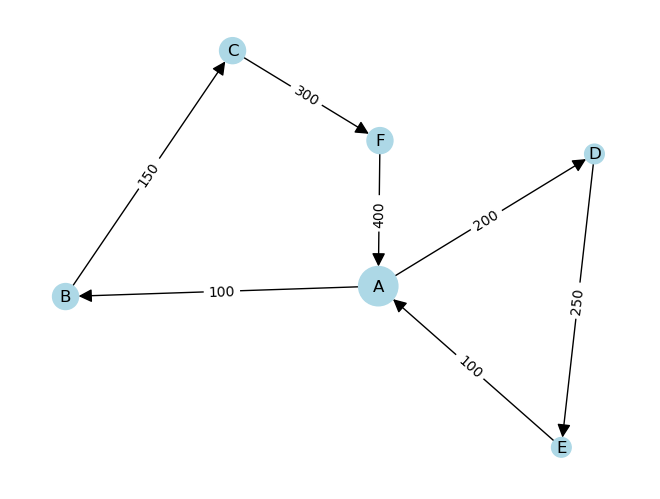

In [181]:
# Visualize the graph with betweenness centrality as node size
node_size = [v * 1000 for v in betweenness.values()]  # Scale for better visualization
pos = nx.spring_layout(G, seed= 5)
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='lightblue', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

### Conclusion
* <b>Node A</b>: Central because it connects multiple paths; has the highest betweenness centrality (0.8), indicating it is a critical intermediary in many transactions.
* <b>Nodes B, C, D, E, F</b>: Their centrality depends on their involvement in connecting paths.
* <b>Nodes B, C, F</b>: Have notable betweenness centrality (0.35 each), highlighting their roles as intermediaries in multiple transaction paths.
* <b>Nodes D, E</b>: Have lower betweenness centrality (0.2 each), indicating they are less central in the network compared to A, B, C, and F.

## 3. Anomaly Detection
<b>Anomaly detection</b> involves identifying unusual patterns in data that do not conform to expected behavior. In the context of the previous example with transaction data, anomaly detection aims to flag suspicious transactions or accounts that deviate from typical transaction patterns. This is crucial in detecting fraudulent activities.

### Anomaly Detection Concepts
1. <b>Outlier Detection</b>: Identifying data points significantly different from the majority.
2. <b>Cluster Analysis</b>: Grouping data points and identifying those that do not fit into any cluster.
3. <b>Statistical Methods</b>: Using statistical tests to identify deviations from the norm.
4. <b>Machine Learning Models</b>: Employing algorithms like Isolation Forest, One-Class SVM, or neural networks to detect anomalies.

### Applying Anomaly Detection to Transaction Data
Using the transaction data, we can apply anomaly detection to flag suspicious accounts or transactions. Here, we'll focus on identifying anomalies based on betweenness centrality and transaction patterns.

### Step-by-Step Example
1. <b>Calculate Betweenness Centrality</b>: Already calculated in the previous example.
2. <b>Flagging Anomalies</b>: Transactions or accounts with unusually high or low betweenness centrality, or unusual revenue-to-traffic ratios.

In [185]:
# Calculate mean and standard deviation of betweenness centrality
mean_betweenness = np.mean(list(betweenness.values()))
std_betweenness = np.std(list(betweenness.values()))

print("mean :", mean_betweenness)
print("std  :", std_betweenness)

mean : 0.375
std  : 0.20155644370746373


In [187]:
# Define a threshold for anomaly detection (e.g., 2 standard deviations from the mean)
threshold = mean_betweenness + 2 * std_betweenness

In [189]:
# Flag anomalies
anomalies = {node: bc for node, bc in betweenness.items() if bc > threshold}
print("Anomalous Nodes:", anomalies)

Anomalous Nodes: {'A': 0.8}


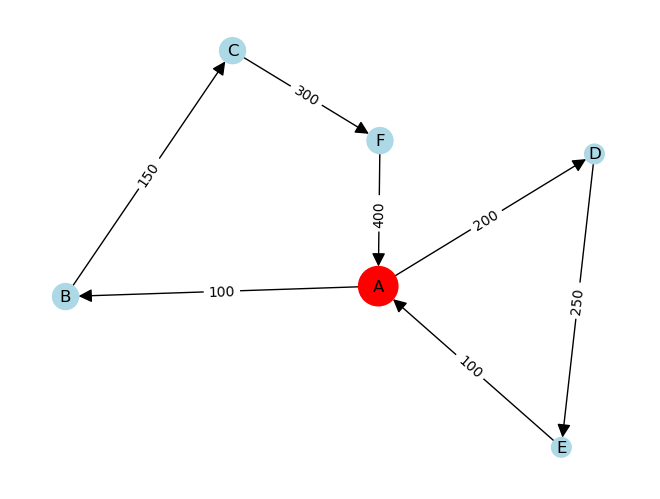

In [191]:
# Visualize the graph with anomalies highlighted
node_size = [v * 1000 for v in betweenness.values()]  # Scale for better visualization
node_color = ['red' if node in anomalies else 'lightblue' for node in G.nodes()]
pos = nx.spring_layout(G, seed = 5)
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_color, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [193]:
for node in G.nodes:
    in_edges = G.in_edges(node, data=True)
    out_edges = G.out_edges(node, data=True)
    total_in = sum(data['weight'] for _, _, data in in_edges)
    total_out = sum(data['weight'] for _, _, data in out_edges)
    if total_in > 2 * total_out:
        print(f"Potential fraud detected at node {node}: total_in={total_in}, total_out={total_out}")

Potential fraud detected at node E: total_in=250, total_out=100


# Inferred
The discrepancy arises because the two methods of detecting anomalies (betweenness centrality and incoming/outgoing transaction amounts) focus on different aspects of the network:
1. <b>Betweenness Centrality</b>: This measure indicates how central a node is in terms of being on the shortest paths between other nodes. Nodes with high betweenness centrality are often critical in the flow of information or transactions.
2. <b>Incoming/Outgoing Transaction Amounts</b>: This method looks at the total amount of transactions coming in versus going out of each node. It flags nodes where incoming transactions are significantly higher than outgoing ones.

## Results Breakdown
### 1. Betweenness Centrality Analysis
Node A: Has the highest betweenness centrality (0.8), indicating it is a critical hub in the transaction network. This centrality measure highlights A’s importance in the network but does not directly indicate fraud.
### 2. Incoming/Outgoing Transaction Analysis
Node E: Detected as having potential fraud because it has total_in=250 and total_out=100, which satisfies the condition total_in > 2 * total_out.

## Why the Discrepancy?
* Different Focus: The betweenness centrality is about the network's structural importance, while the transaction analysis is about the flow of funds. A node might be central (high betweenness) without being involved in unusual transaction patterns, and vice versa.
* Node A vs. Node E: Node A’s centrality makes it important in the network structure, but its incoming and outgoing transactions are balanced. Node E, while not central, has a transaction pattern indicative of potential fraud (more incoming funds compared to outgoing).


# Summary
* <b>Node A</b>: Important due to its central role but doesn’t have unusual transaction patterns based on the incoming/outgoing analysis.
* <b>Node E</b>: Exhibits potentially fraudulent behavior according to the incoming/outgoing analysis.

# Conclusion
Each method provides different insights:
* <b>Betweenness Centrality</b>: Highlights critical nodes for network structure and potential central points for investigation.
* <b>Transaction Analysis</b>: Detects nodes with abnormal transaction patterns, which could be indicative of fraud.

Using both methods together gives a more comprehensive view of the network, combining structural importance with financial behavior.